0. Import bibliotek

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


1. Wyświetlenie listy id produktów, o których zostaly pobrane opinie

In [2]:
print(*[file.split(".")[0] for file in os.listdir("opinions")], sep='\n')

104109736
17469616


2. Wczytanie kodu produktu, o którym mają zostać przeanalizowane opinie

In [3]:
product_id=input("Podaj kod produktu: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars=opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions

AttributeError: 'DataFrame' object has no attribute 'stars'

3. Podstawowe statystyki

In [ ]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count= opinions.cons.astype(bool).sum()
average_stars= opinions.stars.mean()
average_stars

4.071428571428571

4. Histogram części ocen w opiniach

[Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '13')]

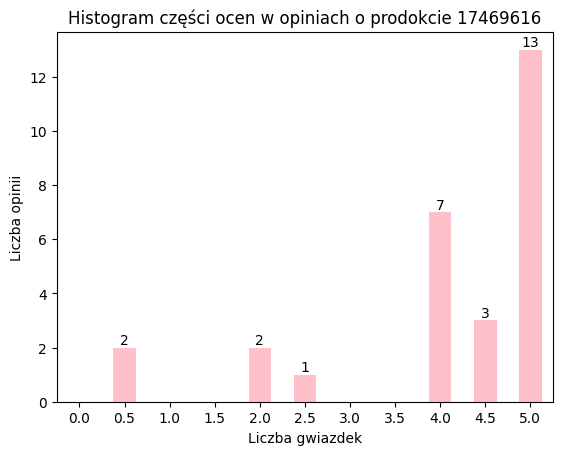

In [ ]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5))
ax=stars_distribution.plot.bar(color="pink")
ax.set_title(f"Histogram części ocen w opiniach o prodokcie {product_id}")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opinii")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(ax.containers[0],label_type='edge', fmt=lambda l: int(l) if l>0 else '')

5. Wykres udziału rekomendacji w opiniach 

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 17469616')

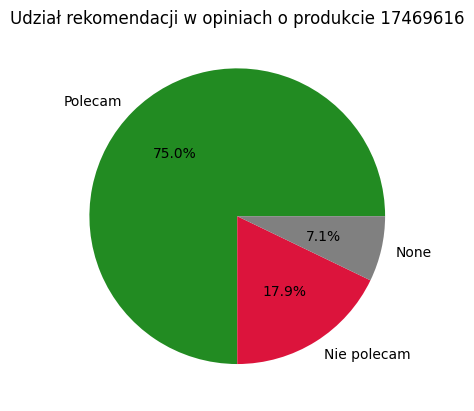

In [ ]:

recommendations_distribution= opinions.recommend.value_counts(dropna=False).reindex(['Polecam', 'Nie polecam', 'Nie mam zdania'])
recommendations_distribution.plot.pie(
    autopct='%1.1f%%',
    label='',
    colors=['forestgreen','crimson','gray']
)
plt.title(f'Udział rekomendacji w opiniach o produkcie {product_id}')